## Library

In [12]:
import PIL
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
import datasets

## Load Dataset

In [13]:
#load dataset(only resize data) directly from huggingface only for exploration the data, make sure there from and to parameter setting with 2527 and 5054.
ds = datasets.load_dataset("garythung/trashnet", split=datasets.ReadInstruction("train", from_=2527, to=5054, unit="abs"))

In [14]:
#check the element of data
ds

Dataset({
    features: ['image', 'label'],
    num_rows: 2527
})

From the dataset we know that dataset contain 2527 row

# Explanatory Data Analysis

## Plotting Image Size

In [15]:
#create a function for explore the variance of image dimension 
def get_dims(dataset):
    arr = np.array(dataset)
    h,w,d = arr.shape #from the shape need to initialize 3 variable height(h), weigth(w), depth(d)
    return h,w #only need height and width for know the variance of dimension

In [16]:
#create list for store the width and height
width = []
height = []
for i in range(0,len(ds)):
    h,w = get_dims(ds[i]["image"])
    width.append(w)
    height.append(h)

In [17]:
#create a dataframe for easly explore and ploting the dimension
def df_of_hw(h,w):
    data = {"height": h,
            "widht": w}
    df = pd.DataFrame(data)
    return df

In [18]:
df_hw = df_of_hw(height,width)
df_hw

,height,widht
0,384,512
1,384,512
2,384,512
3,384,512
4,384,512
...,...,...
2522,384,512
2523,384,512
2524,384,512
2525,384,512


In [19]:
df_hw["height"].value_counts()

height
384    2527
Name: count, dtype: int64

In [20]:
df_hw["widht"].value_counts()

widht
512    2527
Name: count, dtype: int64

In [21]:
df_hw["widht"].unique()

array([512], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

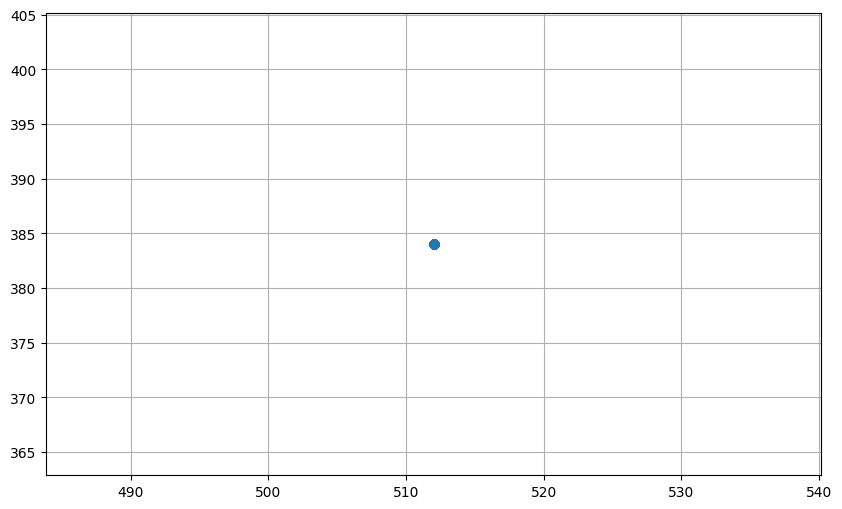

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(width,height,alpha=0.5,colorizer="blue")
plt.grid(True)
plt.show

From figure above, size of image is pretty consistent so there no need for resize, oly need reshape to tensor(M,M) when build dataset. Consistent image size is crucial for deep learning, mismatched matrices will bring your project to a quick stop.<br><br>
Issue: -<br>
Solution: -

## Identifying Class Imbalance

For first, we need to know distribution of the data. Based from the label, we will know how the data distribute

In [23]:
#get the label from ds and create as Series
label_counts = pd.Series(ds["label"]).value_counts()
print(label_counts)

3    594
1    501
4    482
2    410
0    403
5    137
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

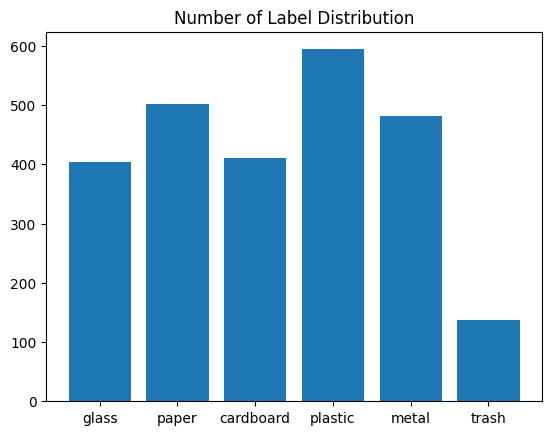

In [24]:
#plotting the label count for effectively see distribution
x = ["glass", "paper", "cardboard", "plastic", "metal", "trash"]
y = label_counts.sort_index().values

plt.title("Number of Label Distribution")
plt.bar(x,y)
plt.show

According to the graph above, we know that the data distribution is unbalanced, especially at the _trash_ label. This unbalanced distribution in a CNN can cause poor performance on labels with low distribution, thereby impacting the overall performance of the model.
<br><br>
Issue: Imbalance distribution category<br>
Solution: Some solutin that can use are upsampling the minority label, augmentaion, or balancing class weight. In this code will use <strong>balancing class weight<strong>.

## Visualization

In [25]:
def show_random_images(dataset, num_images=9):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # 3x3 grid
    random_indices = random.sample(range(len(dataset)), num_images)  # Random indices
    
    for i, ax in enumerate(axes.flat):
        idx = random_indices[i]
        image = dataset[idx]["image"]  # Load image
        label = dataset[idx]["label"]  # Load label
        ax.imshow(image)
        ax.set_title(f"Label: {label}")
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

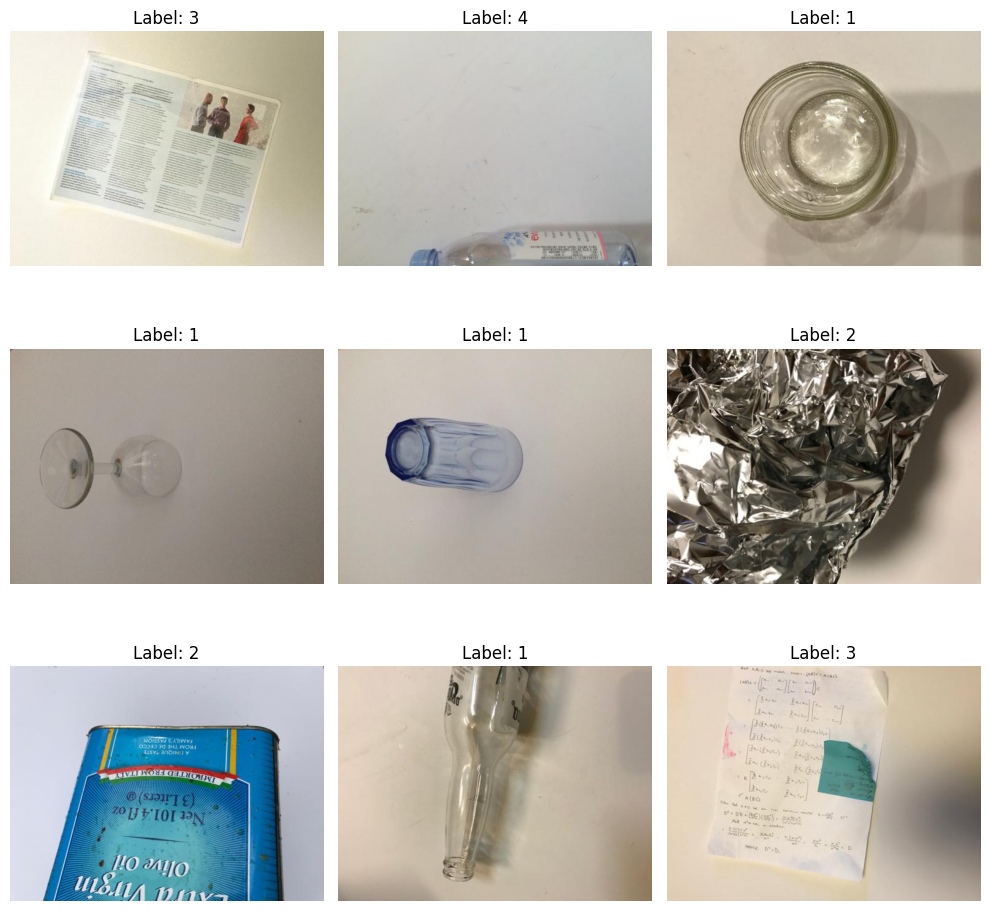

In [ ]:
show_random_images(ds, num_images=9)